<a href="https://colab.research.google.com/github/datadigger01/inter_trade/blob/master/Evaluation(10wk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv", index_col='Cust_ID')

# index columns setting
#df.set_index('Cust_ID', inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
# 컬럼명, missing value, data type 확인
df.info()

#df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   30000 non-null  int64
 1   SEX         30000 non-null  int64
 2   EDUCATION   30000 non-null  int64
 3   MARRIAGE    30000 non-null  int64
 4   AGE         30000 non-null  int64
 5   PAY_0       30000 non-null  int64
 6   PAY_2       30000 non-null  int64
 7   PAY_3       30000 non-null  int64
 8   PAY_4       30000 non-null  int64
 9   PAY_5       30000 non-null  int64
 10  PAY_6       30000 non-null  int64
 11  BILL_AMT1   30000 non-null  int64
 12  BILL_AMT2   30000 non-null  int64
 13  BILL_AMT3   30000 non-null  int64
 14  BILL_AMT4   30000 non-null  int64
 15  BILL_AMT5   30000 non-null  int64
 16  BILL_AMT6   30000 non-null  int64
 17  PAY_AMT1    30000 non-null  int64
 18  PAY_AMT2    30000 non-null  int64
 19  PAY_AMT3    30000 non-null  int64
 20  PAY_AMT4    30000 non-null  

In [ ]:
# Variable/Feature Selection (Not NULL / Not Missing)
label = 'default_YN'

# all features for model
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

0    0.7788
1    0.2212
Name: default_YN, dtype: float64
0    23364
1     6636
Name: default_YN, dtype: int64


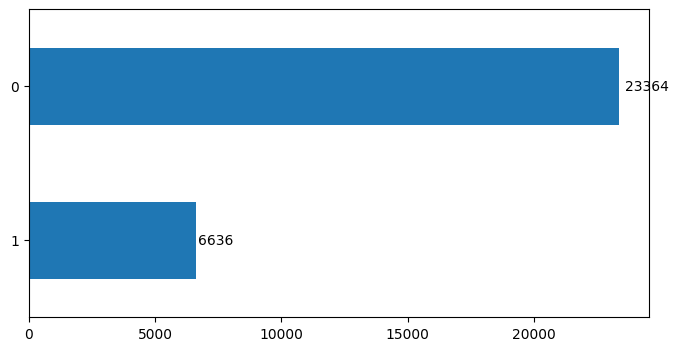

In [ ]:
plt.figure(figsize=(8,4))

ax = df[label].value_counts(ascending=True).plot(kind='barh')
for p in ax.patches:
    x_axis, y_axis, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y_axis+height/2, "%.1d"%(width), va='center')

print(df.default_YN.value_counts(normalize=True))  # Target 비율
print(df.default_YN.value_counts())  # Target/NonTarget 수

### 학습(Train)/검증(Test) 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

# Train 70% Test 30%
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.3, random_state=543)
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Cust_ID,,,,,,,,,,,,,,,,,,,,,
23425,300000,2,1,2,31,-1,-1,-1,-1,-1,...,17865,9215,154926,126482,19099,17865,9243,154975,0,29390
5950,80000,2,2,1,36,0,0,0,0,0,...,50857,39813,40248,40935,2500,2061,1413,1460,1751,1958
2714,50000,2,2,2,28,-2,-2,-1,0,0,...,2698,4640,6554,8434,2037,2698,2000,2000,2000,2000
26495,360000,2,1,1,59,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
21987,500000,2,1,2,29,-1,-1,-1,-1,0,...,75434,928,56705,81334,37039,78079,1708,25000,106260,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,120000,2,2,2,28,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
9524,20000,2,2,1,43,0,0,0,0,0,...,9547,20766,12197,12994,1145,1200,2000,3000,1000,2000
15674,200000,1,1,1,32,-1,2,-1,2,-1,...,760,380,380,0,0,760,0,380,0,154350


## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score

### 1. 학습데이터(Train Data)를 이용하여 학습(Model fitting with train data set)

In [ ]:
model_dt = RandomForestClassifier(max_depth=10)

model_dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### 2. 예측 - 학습된 모델(fitted model)를 이용하여 Test 데이터셋의 결과값 예측(prediction)

In [ ]:
# 예측 결과값(0,1)
predicted_result = model_dt.predict(X_test)
# 예측확률값(0~1)
predicted_probability = model_dt.predict_proba(X_test)
predicted_probability

array([[0.92434241, 0.07565759],
       [0.89404136, 0.10595864],
       [0.87627791, 0.12372209],
       ...,
       [0.68907512, 0.31092488],
       [0.93576436, 0.06423564],
       [0.9184242 , 0.0815758 ]])

In [ ]:
result1 = pd.Series(predicted_result, name='predicted_result', index=X_test.index)
result2 = pd.Series(predicted_probability[:,1], name='predicted_prob', index=X_test.index)
result_f = pd.concat([y_test, result1, result2], axis=1)

result_f.head(20)

,default_YN,predicted_result,predicted_prob
Cust_ID,,,
23425,0,0,0.075658
5950,1,0,0.105959
2714,0,0,0.123722
26495,1,0,0.425122
21987,0,0,0.068378
6298,0,0,0.059519
19341,0,0,0.150100
20160,1,0,0.126332
29852,0,0,0.206081


In [ ]:
result_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 23425 to 23434
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   default_YN        9000 non-null   int64  
 1   predicted_result  9000 non-null   int64  
 2   predicted_prob    9000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 281.2 KB


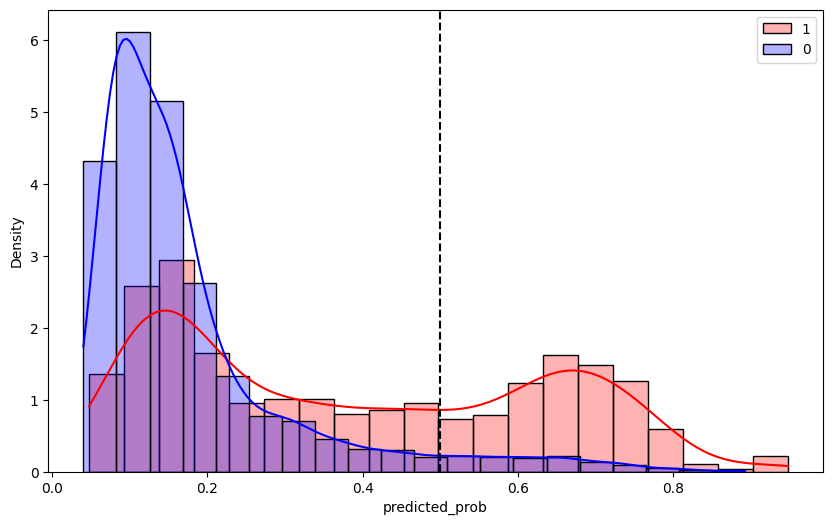

In [ ]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')

#result_f.query('default_YN==1.0')['predicted_prob'].plot(kind='kde',color='blue', label='1')
#result_f.query('default_YN==0.0')['predicted_prob'].plot(kind='kde',color='red',label='0')

sns.histplot(data=result_f.query('default_YN==1')['predicted_prob'], stat='density', kde='True',bins=20, color='red', alpha=0.3, label='1')
sns.histplot(data=result_f.query('default_YN==0')['predicted_prob'], stat='density', kde='True',bins=20, color='blue', alpha=0.3, label='0')

plt.axvline(0.5, linestyle ='--', color='black')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

0    7030
1    1970
Name: default_YN, dtype: int64
[[0.94893314 0.05106686]
 [0.63807107 0.36192893]]


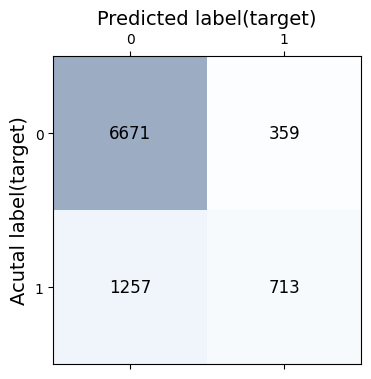

In [ ]:
con_m = confusion_matrix(y_test, predicted_result, normalize=None)  # normalize=c('true','pred','all'), None

print(result_f['default_YN'].value_counts())
print(confusion_matrix(y_test, predicted_result, normalize='true'))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("Recall   : ", recall_score(y_test, predicted_result))
print("Precision: ", precision_score(y_test, predicted_result))
print("F1-Score  :", f1_score(y_test, predicted_result))

Recall   :  0.3619289340101523
Precision:  0.6651119402985075
F1-Score  : 0.46877054569362264


In [ ]:
from sklearn.metrics import precision_recall_curve

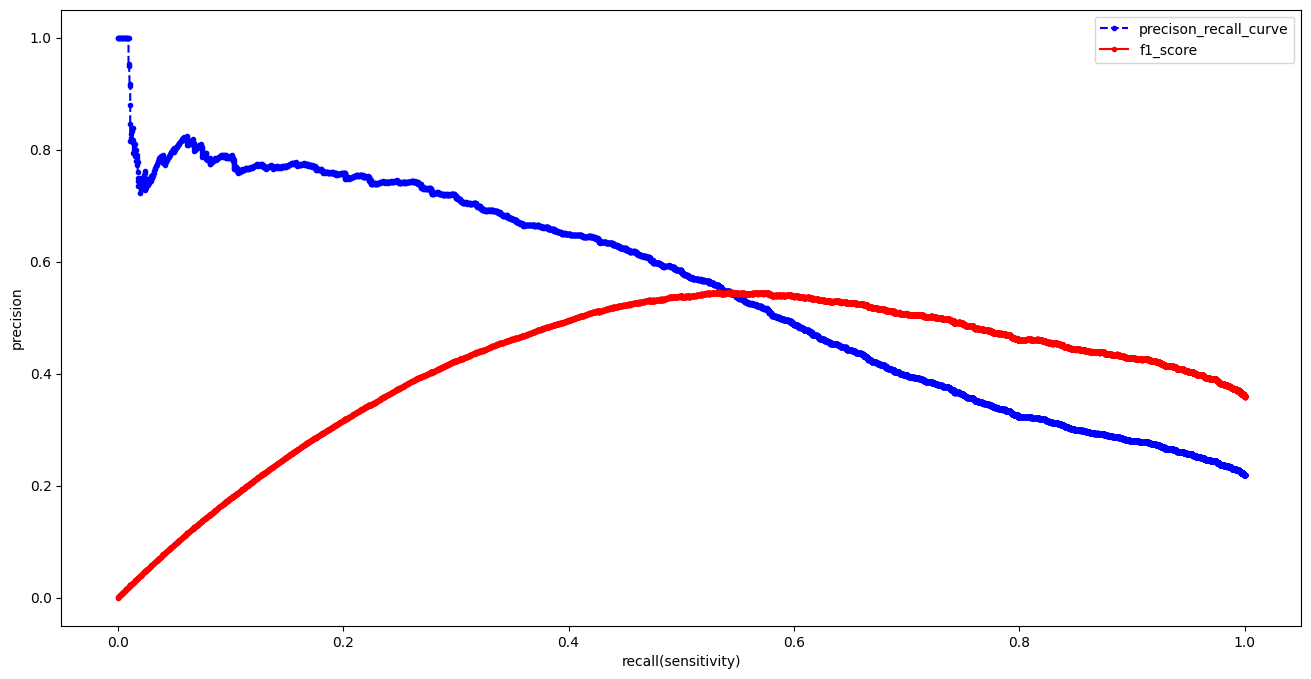

In [ ]:
model_precision, model_recall, threshold = precision_recall_curve(y_test, result_f['predicted_prob'])

plt.figure(figsize=(16,8))
plt.plot(model_recall, model_precision, color='blue', marker='.', linestyle='dashed',label='precison_recall_curve')
plt.plot(model_recall, 2*(model_recall * model_precision/(model_recall + model_precision)), color='red', marker='.',label='f1_score')

plt.xlabel('recall(sensitivity)')
plt.ylabel('precision')
plt.legend()
plt.show()

## ROC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
# Baseline setting
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_= roc_curve(y_test, ns_probs)

In [ ]:
mdl_fpr,mdl_tpr,threshold=roc_curve(y_test, predicted_probability[:,1])

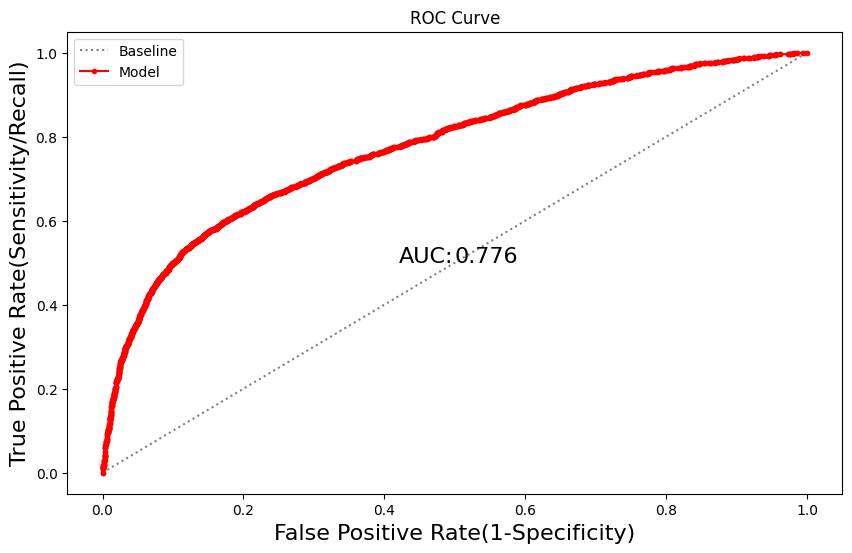

In [ ]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(ns_fpr, ns_tpr,linestyle=':',color='gray', label='Baseline')
plt.plot(mdl_fpr, mdl_tpr,marker='.', color='red',label='Model')

plt.text(0.5, 0.5, np.round(roc_auc_score(y_test, predicted_probability[:,1]),3), fontsize=16)
plt.text(0.42, 0.5, "AUC:", fontsize=16)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=16)
plt.ylabel('True Positive Rate(Sensitivity/Recall)', fontsize=16)

plt.legend()
plt.show()

# ROC/AUC - 분류(Classification) 모형 성능비교
  + Decision Tree
  + RandomForest
  + Gradient Boosting
  + XGboosting
  + LightGBM

In [ ]:
# 1) Decision Tree
clf_dt = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

# 2) RandomForest
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10).fit(X_train, y_train)

#3) Gradient Boosting
clf_gb = GradientBoostingClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10).fit(X_train, y_train)

#4) XGBoosting
clf_xgb = XGBClassifier(n_estimators=100, max_depth=10, use_label_encoder=False ).fit(X_train, y_train)

#5) LightGBM
clf_lgb = LGBMClassifier(n_estimators=100, max_depth=10, min_child_samples=10).fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4666, number of negative: 16334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222190 -> initscore=-1.252947
[LightGBM] [Info] Start training from score -1.252947


In [ ]:
# baseline
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_=roc_curve(y_test, ns_probs)

# 1. Decision Tree
dt_probs = clf_dt.predict_proba(X_test)
dt_probs = dt_probs[:,1]
dt_fpr,dt_tpr,_=roc_curve(y_test, dt_probs)
dt_pred = clf_dt.predict(X_test)

#2. RandomForest
rf_probs = clf_rf.predict_proba(X_test)
rf_probs = rf_probs[:,1]
rf_fpr,rf_tpr,_=roc_curve(y_test, rf_probs)
rf_pred = clf_rf.predict(X_test)

#3. Gradient Boosting
gb_probs = clf_gb.predict_proba(X_test)
gb_probs = gb_probs[:,1]
gb_fpr, gb_tpr,_=roc_curve(y_test, gb_probs)
gb_pred = clf_gb.predict(X_test)

#4. XGBoosting
xgb_probs = clf_xgb.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]
xgb_fpr, xgb_tpr,_=roc_curve(y_test, xgb_probs)
xgb_pred = clf_xgb.predict(X_test)

# 5. LigtGBM
lgb_probs = clf_lgb.predict_proba(X_test)
lgb_probs = lgb_probs[:,1]
lgb_fpr, lgb_tpr,_=roc_curve(y_test, lgb_probs)
lgb_pred = clf_lgb.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


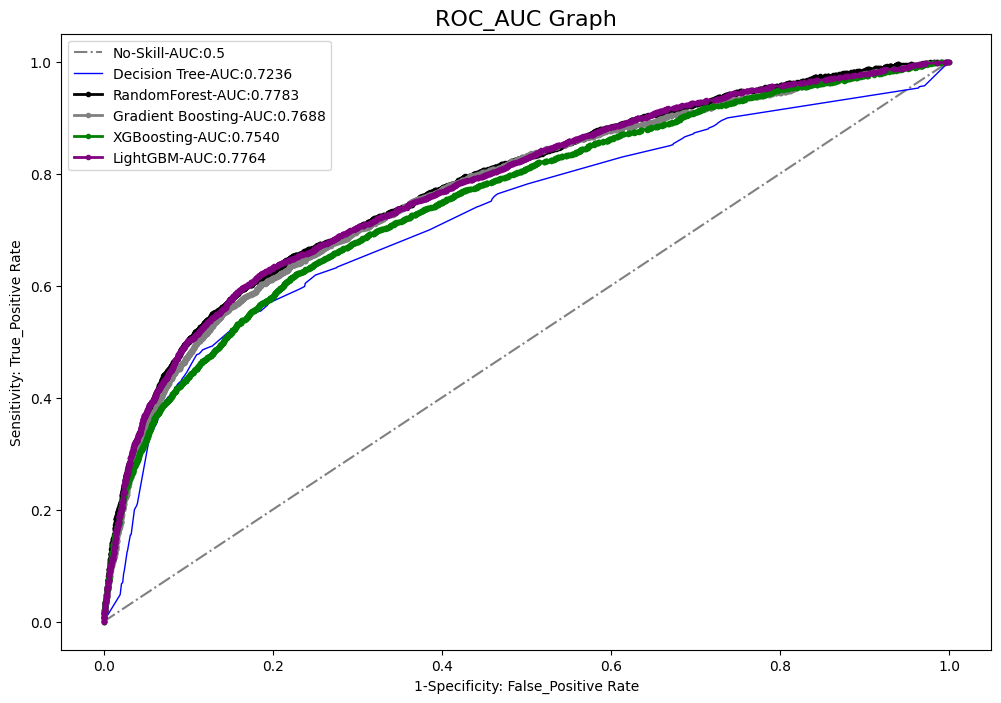

In [ ]:
plt.figure(figsize=(12,8))
plt.title("ROC_AUC Graph", fontsize=16)
plt.plot(ns_fpr, ns_tpr,linestyle='-.',color='gray', label='No-Skill-AUC:0.5')  # baseline

plt.plot(dt_fpr, dt_tpr,linestyle='-', color='blue', lw=1, label='Decision Tree-AUC:%.4f' % roc_auc_score(y_test,dt_probs))  # decision tree
plt.plot(rf_fpr, rf_tpr,marker='.', color='black',lw=2, label='RandomForest-AUC:%.4f' % roc_auc_score(y_test,rf_probs))      # randomforest
plt.plot(gb_fpr, gb_tpr,marker='.', color='gray',lw=2, label='Gradient Boosting-AUC:%.4f' % roc_auc_score(y_test,gb_probs))  # gradient boosting
plt.plot(xgb_fpr, xgb_tpr,marker='.', color='green',lw=2, label='XGBoosting-AUC:%.4f' % roc_auc_score(y_test,xgb_probs))     # XG boosting
plt.plot(lgb_fpr, lgb_tpr,marker='.', color='purple',lw=2, label='LightGBM-AUC:%.4f' % roc_auc_score(y_test,lgb_probs))      # LightGBM

plt.xlabel('1-Specificity: False_Positive Rate')
plt.ylabel('Sensitivity: True_Positive Rate')
plt.legend()
plt.show()

In [ ]:
# AUC Area calculation
print("================  AUC ================")
print("1.Decision Tree-AUC     :", roc_auc_score(y_test,dt_probs))
print("2.RandomForest-AUC      :", roc_auc_score(y_test, rf_probs))
print("3.Gradient Boosting-AUC :", roc_auc_score(y_test, gb_probs))
print("4.XGBoosting-AUC        :", roc_auc_score(y_test,xgb_probs))
print("5.LightGBM-AUC          :", roc_auc_score(y_test,lgb_probs))
print("")

print("================ Accuracy ================")
print("1.Decision Tree-Accuracy    :", accuracy_score(y_test, dt_pred))
print("2.RandomForest-Accuracy     :", accuracy_score(y_test, rf_pred))
print("3.Gradient Boosting-Accuracy:", accuracy_score(y_test, gb_pred))
print("4.XGBoosting-Accuracy       :", accuracy_score(y_test, xgb_pred))
print("5.LightGBM-Accuracy         :", accuracy_score(y_test, lgb_pred))
print("")

print("================ F1-Score ================")
print("1.Decision Tree-F1    :", f1_score(y_test, dt_pred))
print("2.RandomForest-F1     :", f1_score(y_test, rf_pred))
print("3.Gradient Boosting-F1:", f1_score(y_test, gb_pred))
print("4.XGBoosting-F1       :", f1_score(y_test, xgb_pred))
print("5.LightGBM-F1         :", f1_score(y_test, lgb_pred))
print("")

print("================ Recall ================")
print("1.Decision Tree-Recall    :", recall_score(y_test, dt_pred))
print("2.RandomForest-Recall     :", recall_score(y_test, rf_pred))
print("3.Gradient Boosting-Recall:", recall_score(y_test, gb_pred))
print("4.XGBoosting-Recall       :", recall_score(y_test, xgb_pred))
print("5.LightGBM-Recall         :", recall_score(y_test, lgb_pred))
print("")

print("================ Precision ================")
print("1.Decision Tree-Precision    :", precision_score(y_test, dt_pred))
print("2.RandomForest-Precision     :", precision_score(y_test, rf_pred))
print("3.Gradient Boosting-Precision:", precision_score(y_test, gb_pred))
print("4.XGBoosting-Precision       :", precision_score(y_test, xgb_pred))
print("5.LightGBM-Precision         :", precision_score(y_test, lgb_pred))


================  AUC ================
1.Decision Tree-AUC     : 0.7236094764280712
2.RandomForest-AUC      : 0.7782905387353691
3.Gradient Boosting-AUC : 0.7687756244088063
4.XGBoosting-AUC        : 0.7539926782245778
5.LightGBM-AUC          : 0.7764272407593273

================ Accuracy ================
1.Decision Tree-Accuracy    : 0.8105555555555556
2.RandomForest-Accuracy     : 0.821
3.Gradient Boosting-Accuracy: 0.8164444444444444
4.XGBoosting-Accuracy       : 0.8115555555555556
5.LightGBM-Accuracy         : 0.8236666666666667

================ F1-Score ================
1.Decision Tree-F1    : 0.47554598585050756
2.RandomForest-F1     : 0.46814130075932653
3.Gradient Boosting-F1: 0.471190781049936
4.XGBoosting-F1       : 0.4680050188205772
5.LightGBM-F1         : 0.48888888888888893

================ Recall ================
1.Decision Tree-Recall    : 0.39238578680203046
2.RandomForest-Recall     : 0.3598984771573604
3.Gradient Boosting-Recall: 0.37360406091370557
4.XGBoosting-R

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

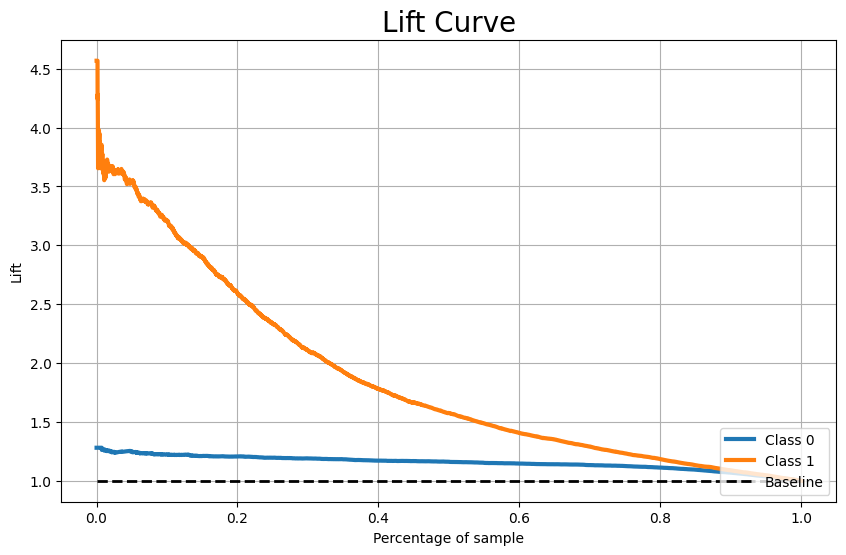

In [ ]:
skplt.metrics.plot_lift_curve(y_test, clf_rf.predict_proba(X_test), figsize=(10, 6), title_fontsize=20, text_fontsize=10)


plt.show()